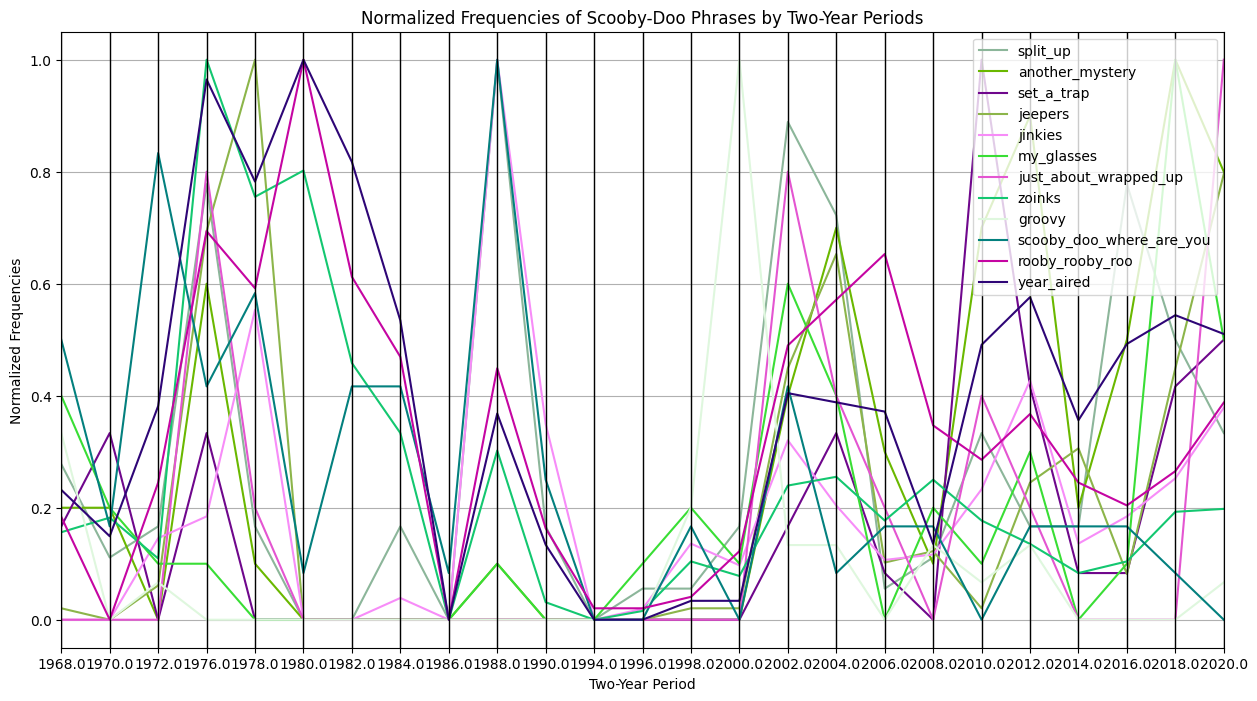

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

data = pd.read_csv('scoobydoo.csv', usecols=['date_aired', 'split_up', 'another_mystery', 'set_a_trap', 'jeepers', 'jinkies', 'my_glasses', 'just_about_wrapped_up', 'zoinks', 'groovy', 'scooby_doo_where_are_you', 'rooby_rooby_roo'])
data['date_aired'] = pd.to_datetime(data['date_aired'])
data['year_aired'] = data['date_aired'].dt.year
data.drop('date_aired', axis=1, inplace=True)

data['two_year_period'] = (data['year_aired'] // 2) * 2
grouped_data = data.groupby('two_year_period').sum()

normalized_data = (grouped_data - grouped_data.min()) / (grouped_data.max() - grouped_data.min())
normalized_data.reset_index(inplace=True)
normalized_data = normalized_data.transpose()
new_header = normalized_data.iloc[0]
normalized_data = normalized_data[1:]
normalized_data.columns = new_header
normalized_data['phrase'] = normalized_data.index

fig, ax = plt.subplots(figsize=(15, 8))
parallel_coordinates(normalized_data, class_column='phrase', cols=new_header, ax=ax)

plt.title('Normalized Frequencies of Scooby-Doo Phrases by Two-Year Periods')
plt.xlabel('Two-Year Period')
plt.ylabel('Normalized Frequencies')

plt.legend(loc='upper right')
plt.show()


caught_fred  caught_daphnie  caught_velma  caught_shaggy  caught_scooby
False        False           False         False          False            7.049627
                                                          True             7.427778
                                           True           False            7.506667
                                                          True             7.346667
                             True          False          False            7.239130
                                                          True             6.966667
                                           True           False            6.900000
             True            False         False          False            7.220000
                                                          True             5.100000
                                           True           True             7.300000
                             True          False          False            6.900000
True

ValueError: setting an array element with a sequence.

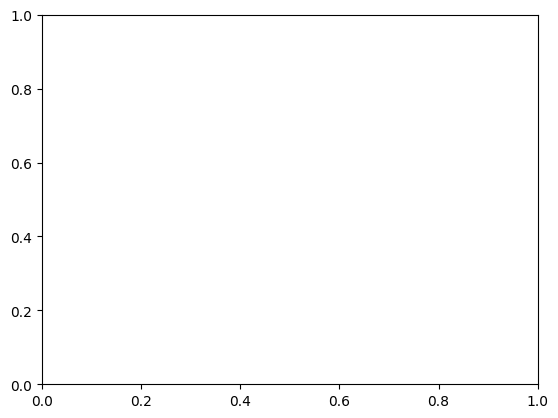

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

scoobydoo = pd.read_csv('scoobydoo.csv')

scoobydoo[['caught_fred', 'caught_daphnie', 'caught_velma', 'caught_shaggy', 'caught_scooby']] = scoobydoo[['caught_fred', 'caught_daphnie', 'caught_velma', 'caught_shaggy', 'caught_scooby']].fillna(False)

grouped = scoobydoo.groupby(['caught_fred', 'caught_daphnie', 'caught_velma', 'caught_shaggy', 'caught_scooby'])['imdb'].mean()
print(grouped)

# Create a scatter plot
plt.scatter(grouped, grouped.index, c=grouped, cmap='viridis', alpha=0.5)
plt.xlabel('IMDb Rating')
plt.ylabel('Caught By')
plt.title('Scooby-Doo Episodes by IMDb Rating and Catcher')
plt.colorbar()
plt.show()

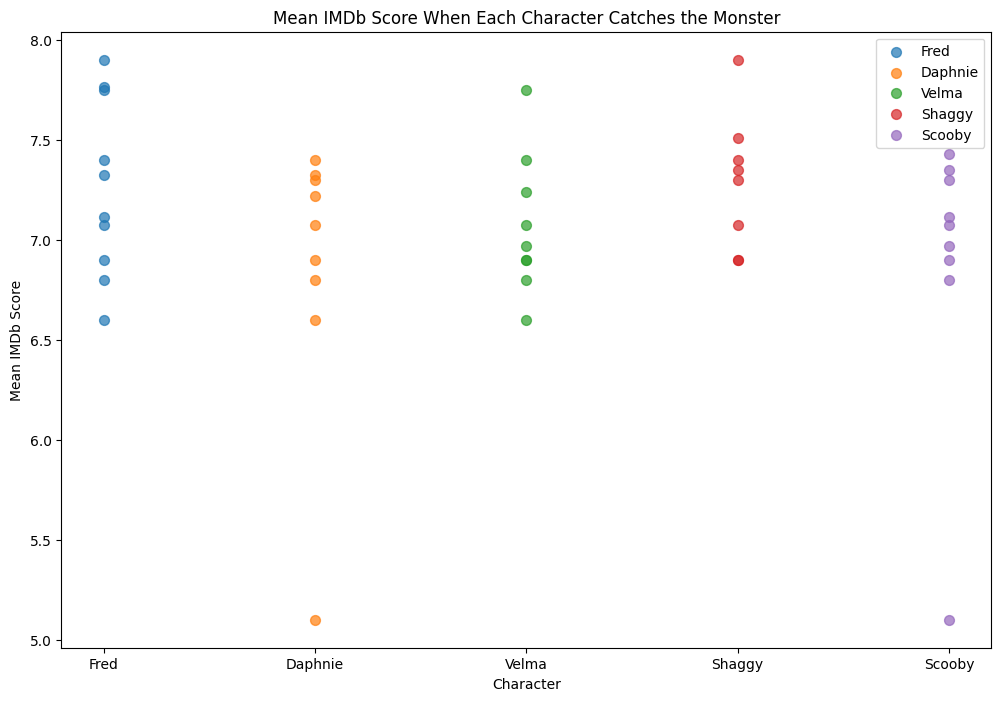

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

scoobydoo = pd.read_csv('scoobydoo.csv')

scoobydoo[['caught_fred', 'caught_daphnie', 'caught_velma', 'caught_shaggy', 'caught_scooby']] = scoobydoo[['caught_fred', 'caught_daphnie', 'caught_velma', 'caught_shaggy', 'caught_scooby']].fillna(False)

grouped = scoobydoo.groupby(['caught_fred', 'caught_daphnie', 'caught_velma', 'caught_shaggy', 'caught_scooby'])['imdb'].mean()
grouped_df = grouped.reset_index()

characters = ['Fred', 'Daphnie', 'Velma', 'Shaggy', 'Scooby']
catch_columns = ['caught_fred', 'caught_daphnie', 'caught_velma', 'caught_shaggy', 'caught_scooby']

fig, ax = plt.subplots(figsize=(12, 8))

for i, character in enumerate(characters):
    char_data = grouped_df[grouped_df[catch_columns[i]]]    
    ax.scatter([character] * len(char_data), char_data['imdb'], label=character, s=50, alpha=0.7)

plt.title('Mean IMDb Score When Each Character Catches the Monster')
plt.xlabel('Character')
plt.ylabel('Mean IMDb Score')
plt.legend(loc='best')
plt.show()


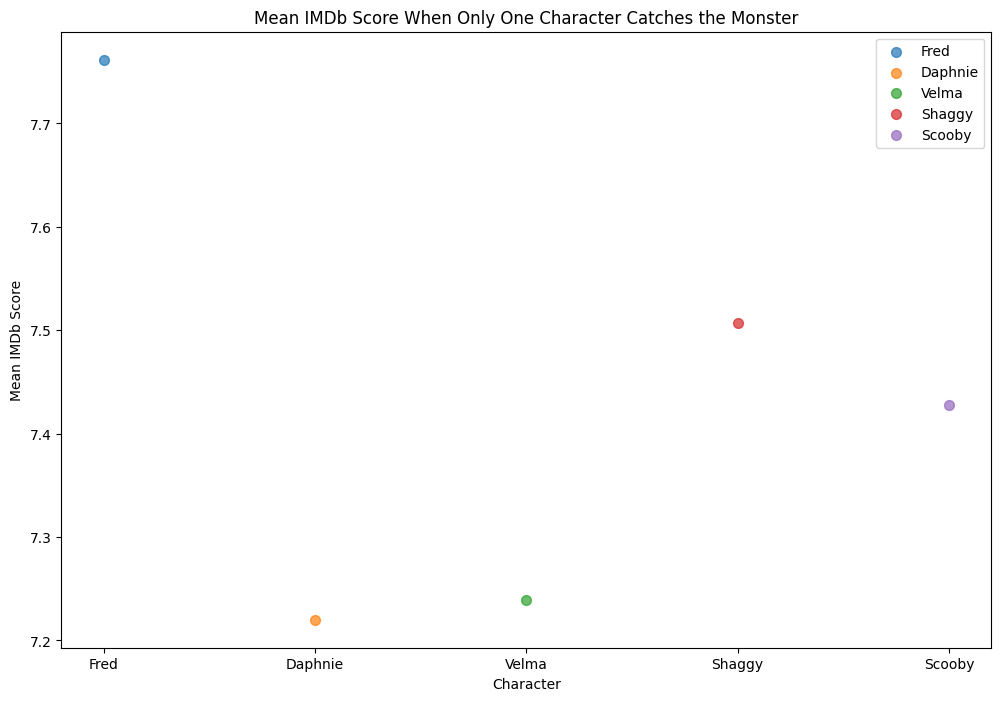

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

scoobydoo = pd.read_csv('scoobydoo.csv')

scoobydoo[['caught_fred', 'caught_daphnie', 'caught_velma', 'caught_shaggy', 'caught_scooby']] = scoobydoo[['caught_fred', 'caught_daphnie', 'caught_velma', 'caught_shaggy', 'caught_scooby']].fillna(False)

grouped = scoobydoo.groupby(['caught_fred', 'caught_daphnie', 'caught_velma', 'caught_shaggy', 'caught_scooby'])['imdb'].mean()
grouped_df = grouped.reset_index()

# Filter the grouped_df for cases when only a single character catches the monster
single_catch = grouped_df[grouped_df[['caught_fred', 'caught_daphnie', 'caught_velma', 'caught_shaggy', 'caught_scooby']].sum(axis=1) == 1]

characters = ['Fred', 'Daphnie', 'Velma', 'Shaggy', 'Scooby']
catch_columns = ['caught_fred', 'caught_daphnie', 'caught_velma', 'caught_shaggy', 'caught_scooby']

fig, ax = plt.subplots(figsize=(12, 8))

for i, character in enumerate(characters):
    char_data = single_catch[single_catch[catch_columns[i]]]
    ax.scatter([character] * len(char_data), char_data['imdb'], label=character, s=50, alpha=0.7)

plt.title('Mean IMDb Score When Only One Character Catches the Monster')
plt.xlabel('Character')
plt.ylabel('Mean IMDb Score')
plt.legend(loc='best')
plt.show()


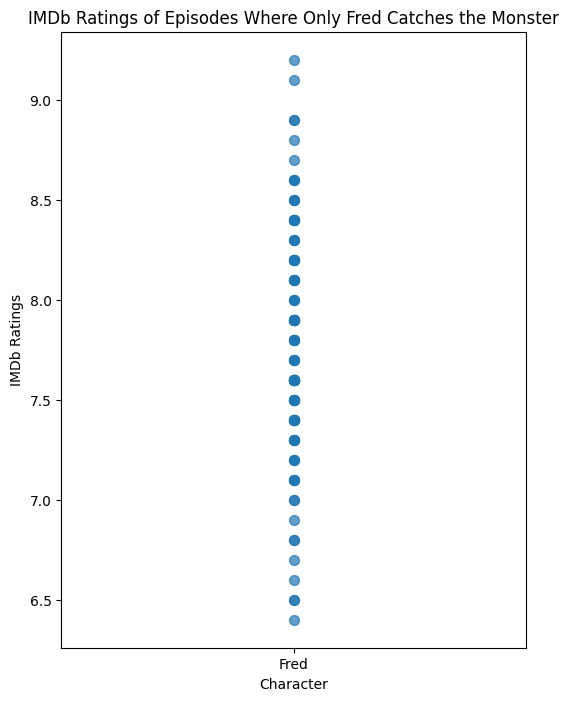

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

scoobydoo = pd.read_csv('scoobydoo.csv')

scoobydoo[['caught_fred', 'caught_daphnie', 'caught_velma', 'caught_shaggy', 'caught_scooby']] = scoobydoo[['caught_fred', 'caught_daphnie', 'caught_velma', 'caught_shaggy', 'caught_scooby']].fillna(False)

# Filter the data for cases when only Fred catches the monster
only_fred = scoobydoo[(scoobydoo['caught_fred']) & (~scoobydoo['caught_daphnie']) & (~scoobydoo['caught_velma']) & (~scoobydoo['caught_shaggy']) & (~scoobydoo['caught_scooby'])]

fig, ax = plt.subplots(figsize=(6, 8))
ax.scatter(['Fred'] * len(only_fred), only_fred['imdb'], s=50, alpha=0.7)

plt.title('IMDb Ratings of Episodes Where Only Fred Catches the Monster')
plt.xlabel('Character')
plt.ylabel('IMDb Ratings')
plt.show()


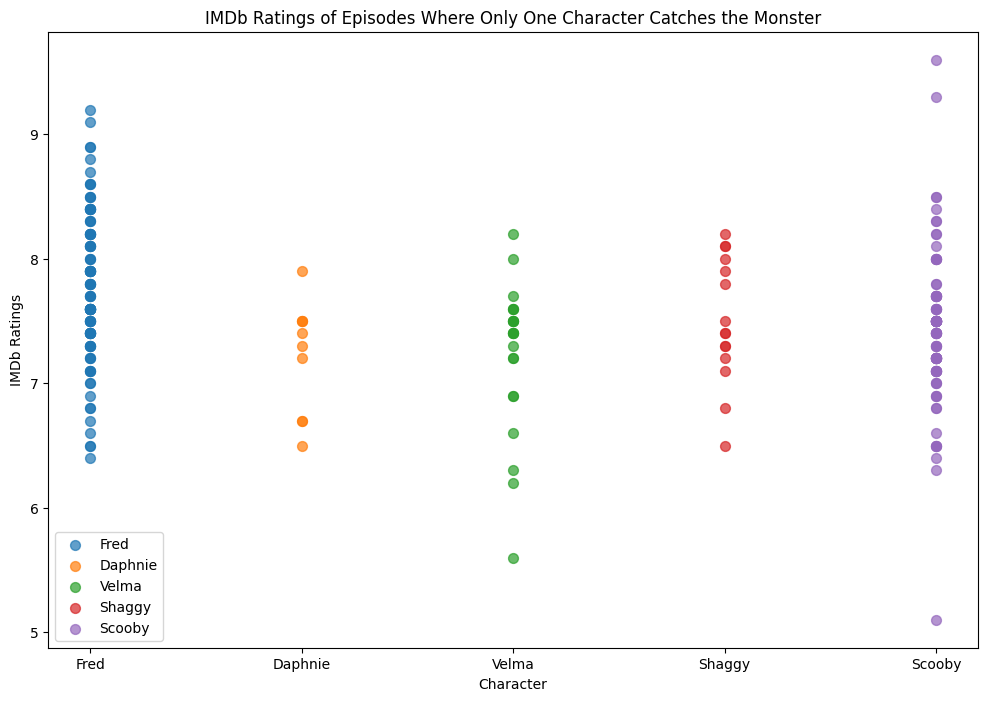

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

scoobydoo = pd.read_csv('scoobydoo.csv')

scoobydoo[['caught_fred', 'caught_daphnie', 'caught_velma', 'caught_shaggy', 'caught_scooby']] = scoobydoo[['caught_fred', 'caught_daphnie', 'caught_velma', 'caught_shaggy', 'caught_scooby']].fillna(False)

# Filter the data for cases when only one character catches the monster
single_catch = scoobydoo[scoobydoo[['caught_fred', 'caught_daphnie', 'caught_velma', 'caught_shaggy', 'caught_scooby']].sum(axis=1) == 1]

characters = ['Fred', 'Daphnie', 'Velma', 'Shaggy', 'Scooby']
catch_columns = ['caught_fred', 'caught_daphnie', 'caught_velma', 'caught_shaggy', 'caught_scooby']

fig, ax = plt.subplots(figsize=(12, 8))

for i, character in enumerate(characters):
    char_data = single_catch[single_catch[catch_columns[i]]]
    ax.scatter([character] * len(char_data), char_data['imdb'], label=character, s=50, alpha=0.7)

plt.title('IMDb Ratings of Episodes Where Only One Character Catches the Monster')
plt.xlabel('Character')
plt.ylabel('IMDb Ratings')
plt.legend(loc='best')
plt.show()


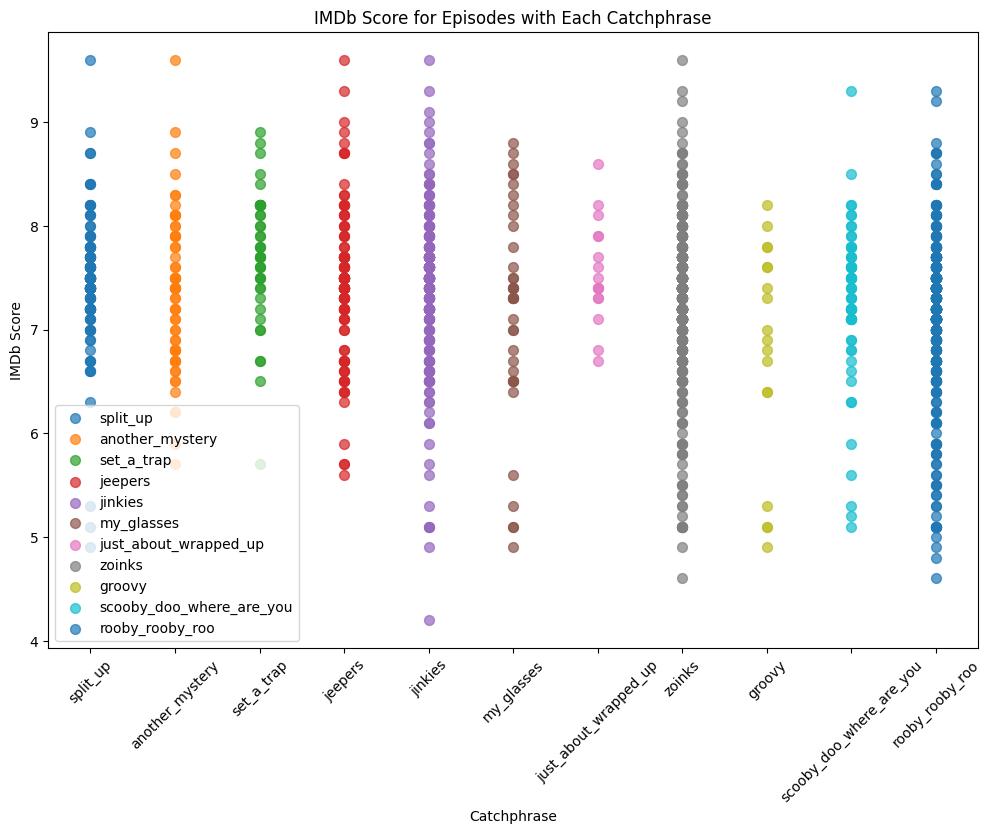

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

scoobydoo = pd.read_csv('scoobydoo.csv')

catchphrases = ['split_up', 'another_mystery', 'set_a_trap', 'jeepers', 'jinkies', 'my_glasses', 'just_about_wrapped_up', 'zoinks', 'groovy', 'scooby_doo_where_are_you', 'rooby_rooby_roo']

fig, ax = plt.subplots(figsize=(12, 8))

for catchphrase in catchphrases:
    catchphrase_data = scoobydoo[scoobydoo[catchphrase] > 0]
    ax.scatter([catchphrase] * len(catchphrase_data), catchphrase_data['imdb'], label=catchphrase, s=50, alpha=0.7)

plt.title('IMDb Score for Episodes with Each Catchphrase')
plt.xlabel('Catchphrase')
plt.ylabel('IMDb Score')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()
